# Machine Learning (SVM & Random Forest)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_validate
import seaborn as sn
import matplotlib.pyplot as plt
import graphviz


#### Import dataset

In [2]:
ngs_reads = pd.read_json('exported_datasets/sau_full_features.json')

In [3]:
ngs_reads.reset_index(drop=True, inplace=True)

In [4]:
ngs_reads.columns

Index(['organism', 'technology', 'read_number', 'evaluation',
       'module_6_n_content', 'total_sequences', 'percent_gc',
       'min_sequence_length', 'max_sequence_length', 'module_1_status',
       'module_2_status', 'module_3_status', 'module_4_status',
       'module_5_status', 'module_6_status', 'module_7_status',
       'module_8_status', 'module_9_status', 'module_10_status', 'module_1_a0',
       'module_1_a1', 'module_1_a2', 'module_1_a3', 'module_2_std_neg',
       'module_2_std_pos', 'module_3_alpha', 'module_3_beta',
       'module_4_diff_mean', 'module_4_diff_std', 'module_7_alpha',
       'module_7_beta', 'module_8_alpha', 'module_8_beta'],
      dtype='object')

In [5]:
ngs_reads.columns

Index(['organism', 'technology', 'read_number', 'evaluation',
       'module_6_n_content', 'total_sequences', 'percent_gc',
       'min_sequence_length', 'max_sequence_length', 'module_1_status',
       'module_2_status', 'module_3_status', 'module_4_status',
       'module_5_status', 'module_6_status', 'module_7_status',
       'module_8_status', 'module_9_status', 'module_10_status', 'module_1_a0',
       'module_1_a1', 'module_1_a2', 'module_1_a3', 'module_2_std_neg',
       'module_2_std_pos', 'module_3_alpha', 'module_3_beta',
       'module_4_diff_mean', 'module_4_diff_std', 'module_7_alpha',
       'module_7_beta', 'module_8_alpha', 'module_8_beta'],
      dtype='object')

#### extract target variable

In [6]:
target = ngs_reads.evaluation.values
ngs_reads.drop(columns='evaluation', inplace=True)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#### remove unused columns from dataset

In [7]:
ngs_reads.drop(columns=['organism', 'technology', 'read_number'], inplace=True)
ngs_reads

,module_6_n_content,total_sequences,percent_gc,min_sequence_length,max_sequence_length,module_1_status,module_2_status,module_3_status,module_4_status,module_5_status,...,module_2_std_neg,module_2_std_pos,module_3_alpha,module_3_beta,module_4_diff_mean,module_4_diff_std,module_7_alpha,module_7_beta,module_8_alpha,module_8_beta
0,0.000191,511669,34,35,301,0,2,2,0,2,...,0.152436,0.110886,166.495429,5.099693,0.024625,0.068540,170.582444,1.033088,0.126128,6.786162
1,0.000584,220494,34,35,301,2,1,2,0,2,...,0.638471,0.489727,165.938485,5.605282,0.023490,0.066026,170.611964,1.011972,0.206852,11.074234
2,0.000187,6015314,65,35,301,0,1,2,0,1,...,0.588583,0.274379,33.631888,2.069546,0.031007,0.068681,170.583420,1.003109,0.049906,1.944473
3,0.000017,1916272,35,35,301,2,2,2,0,2,...,0.191566,0.094444,166.506391,5.109851,0.025570,0.066240,170.540443,1.021960,-0.807414,0.005944
4,0.000000,334,35,69,301,0,0,2,0,0,...,4.911008,1.864702,0.108615,-0.116077,0.114478,0.071359,170.611536,1.012826,9.004749,162.619610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.002000,1210750,34,35,251,2,2,2,0,2,...,0.105282,0.073889,166.434931,5.145971,0.026621,0.072611,170.470289,1.103053,0.055053,2.504224
74,0.002003,1323948,34,35,251,2,2,2,0,2,...,0.135910,0.081521,166.468700,5.102442,0.026537,0.072795,170.411534,1.128509,0.053906,2.144352
75,0.000084,1269962,34,35,251,2,2,2,0,2,...,0.075170,0.046361,166.508326,5.089056,0.026458,0.073217,170.459107,1.153445,0.055227,2.224365
76,0.000085,1210750,34,35,251,2,2,2,0,2,...,0.051791,0.048030,166.506065,4.959956,0.026661,0.072356,170.490334,1.128919,0.053438,2.398817


#### train-test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(ngs_reads, target, test_size=0.3, random_state=109)

#### Confusion Matrix Heatmap Training Set

<AxesSubplot:>

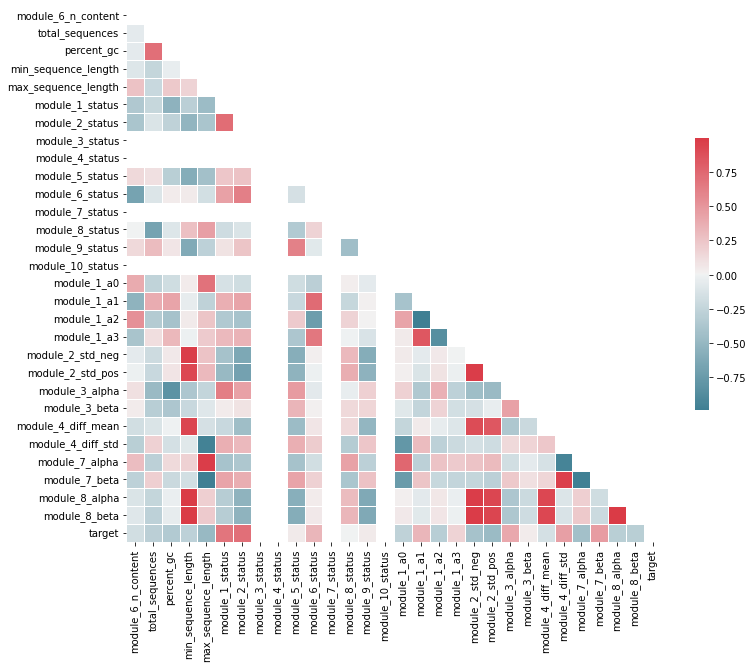

In [9]:
train = X_train.copy()
train.loc[:, 'target'] = y_train.tolist()
train

corr_matrix = train.corr()

mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
sn.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5})

#### Support Vector Machine Training

In [10]:
clf_svc = svm.SVC(kernel='linear')

In [11]:
clf_svc.fit(X_train, y_train)

SVC(kernel='linear')

##### SVM performance

In [12]:
y_pred=clf_svc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.7083333333333334
Precision:  0.8666666666666667
Recall:  0.7222222222222222
F1 Score:  0.7878787878787877


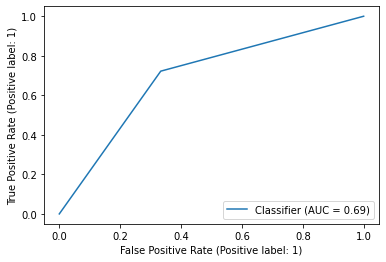

In [13]:
metrics.RocCurveDisplay.from_predictions(y_test, y_pred)

#### SVM with Cross Validation

In [14]:
clf_svm_cv = svm.SVC(kernel='linear')
scores = cross_validate(clf_svm_cv, ngs_reads, target, cv=5, 
                        scoring=('accuracy', 'precision', 'recall', 'f1'), return_train_score=True)
print("Accuracies: ", scores['test_accuracy'])
print("Precision: ", scores['test_precision'])
print("Recall: ", scores['test_recall'])
print("F1 Scores: ", scores['test_f1'])

print("Accuracy: %0.2f +/- %0.2f" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
print("Precision: %0.2f +/- %0.2f" % (scores['test_precision'].mean(), scores['test_precision'].std()))
print("Recall: %0.2f +/- %0.2f" % (scores['test_recall'].mean(), scores['test_recall'].std()))
print("F1 Score: %0.2f +/- %0.2f" % (scores['test_f1'].mean(), scores['test_f1'].std()))

Accuracies:  [0.75       0.75       0.6875     0.86666667 1.        ]
Precision:  [0.73333333 0.73333333 0.8        0.9        1.        ]
Recall:  [1.         1.         0.72727273 0.9        1.        ]
F1 Scores:  [0.84615385 0.84615385 0.76190476 0.9        1.        ]
Accuracy: 0.81 +/- 0.11
Precision: 0.83 +/- 0.10
Recall: 0.93 +/- 0.11
F1 Score: 0.87 +/- 0.08


#### Decision Tree

In [15]:
clf_dt = tree.DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)

In [16]:
y_pred = clf_dt.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.9166666666666666
Precision:  1.0
Recall:  0.8888888888888888
F1 Score:  0.9411764705882353


[Text(0.5, 0.9, 'module_2_std_neg <= 0.134\ngini = 0.444\nsamples = 54\nvalue = [18, 36]\nclass = good'),
 Text(0.25, 0.7, 'module_1_a3 <= -0.0\ngini = 0.057\nsamples = 34\nvalue = [1, 33]\nclass = good'),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = ugly'),
 Text(0.375, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [0, 33]\nclass = good'),
 Text(0.75, 0.7, 'module_4_diff_mean <= 0.024\ngini = 0.255\nsamples = 20\nvalue = [17, 3]\nclass = ugly'),
 Text(0.625, 0.5, 'total_sequences <= 578143.0\ngini = 0.49\nsamples = 7\nvalue = [4, 3]\nclass = ugly'),
 Text(0.5, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = ugly'),
 Text(0.75, 0.3, 'module_8_alpha <= 0.075\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = good'),
 Text(0.625, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = ugly'),
 Text(0.875, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = good'),
 Text(0.875, 0.5, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]\nclass = ugly')]

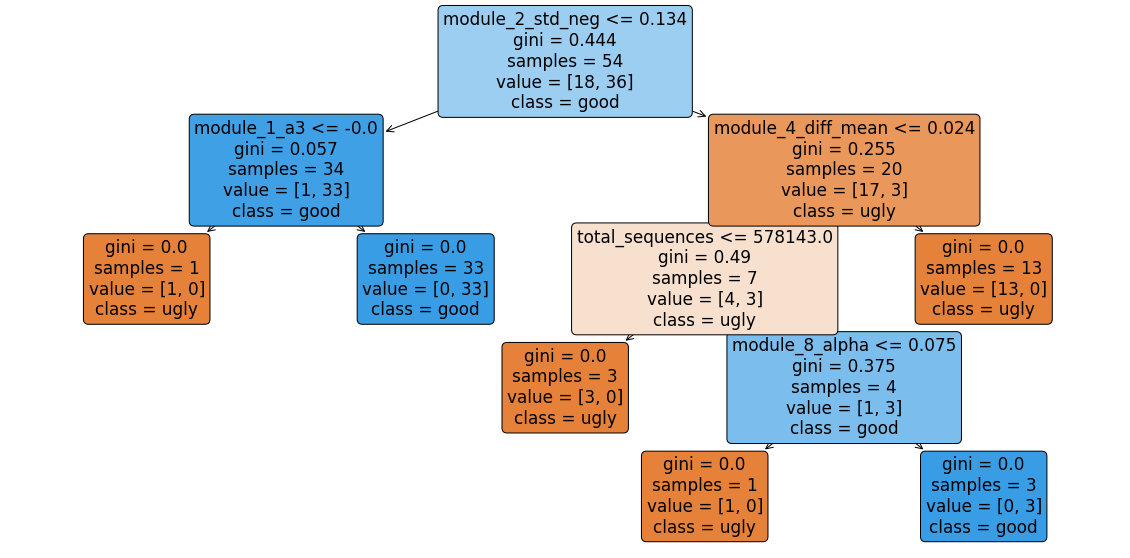

In [17]:
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(clf_dt, 
          feature_names=ngs_reads.columns,
          class_names=['ugly', 'good'], 
          filled=True, impurity=True, 
          rounded=True)

In [18]:
clf_dt_cv = tree.DecisionTreeClassifier()
scores = cross_validate(clf_dt_cv, ngs_reads, target, cv=10, 
                        scoring=('accuracy', 'precision', 'recall', 'f1'), return_train_score=True)
print("Accuracies: ", scores['test_accuracy'])
print("Precision: ", scores['test_precision'])
print("Recall: ", scores['test_recall'])
print("F1 Scores: ", scores['test_f1'])

print("Accuracy: %0.2f +/- %0.2f" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
print("Precision: %0.2f +/- %0.2f" % (scores['test_precision'].mean(), scores['test_precision'].std()))
print("Recall: %0.2f +/- %0.2f" % (scores['test_recall'].mean(), scores['test_recall'].std()))
print("F1 Score: %0.2f +/- %0.2f" % (scores['test_f1'].mean(), scores['test_f1'].std()))

Accuracies:  [0.875 0.875 0.875 0.875 1.    1.    1.    1.    1.    1.   ]
Precision:  [1.         1.         1.         0.83333333 1.         1.
 1.         1.         1.         1.        ]
Recall:  [0.8 0.8 0.8 1.  1.  1.  1.  1.  1.  1. ]
F1 Scores:  [0.88888889 0.88888889 0.88888889 0.90909091 1.         1.
 1.         1.         1.         1.        ]
Accuracy: 0.95 +/- 0.06
Precision: 0.98 +/- 0.05
Recall: 0.94 +/- 0.09
F1 Score: 0.96 +/- 0.05


#### Random Forest Training

In [19]:
clf_rf=RandomForestClassifier(n_estimators=100, verbose=True)

In [20]:
clf_rf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(verbose=True)

##### Random Forest performance

In [21]:
y_pred = clf_rf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.9583333333333334
Precision:  0.9473684210526315
Recall:  1.0
F1 Score:  0.972972972972973


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


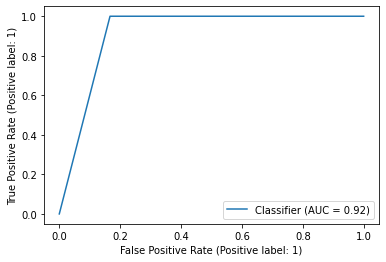

In [22]:
metrics.RocCurveDisplay.from_predictions(y_test, y_pred)

#### Feature Importance Random Forest

Text(0.5, 0, 'Relative Importance')

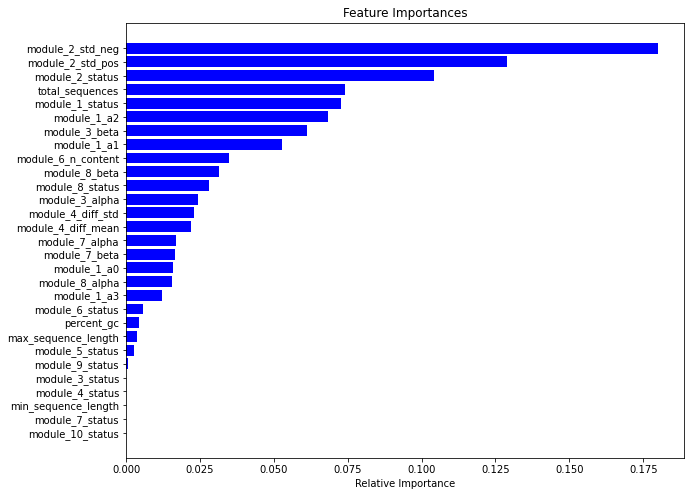

In [23]:
importances = clf_rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), X_train.columns[indices])
plt.xlabel('Relative Importance')

#### Random Forest with Cross Validation

In [24]:
clf_rf_cv = RandomForestClassifier(n_estimators=100)
scores = cross_validate(clf_rf_cv, ngs_reads, target, cv=10, 
                        scoring=('accuracy', 'precision', 'recall', 'f1'), return_train_score=True)
print("Accuracies: ", scores['test_accuracy'])
print("Precision: ", scores['test_precision'])
print("Recall: ", scores['test_recall'])
print("F1 Scores: ", scores['test_f1'])

print("Accuracy: %0.2f +/- %0.2f" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
print("Precision: %0.2f +/- %0.2f" % (scores['test_precision'].mean(), scores['test_precision'].std()))
print("Recall: %0.2f +/- %0.2f" % (scores['test_recall'].mean(), scores['test_recall'].std()))
print("F1 Score: %0.2f +/- %0.2f" % (scores['test_f1'].mean(), scores['test_f1'].std()))



Accuracies:  [1.    0.875 0.875 1.    0.875 1.    1.    1.    1.    1.   ]
Precision:  [1.         0.83333333 1.         1.         0.85714286 1.
 1.         1.         1.         1.        ]
Recall:  [1.  1.  0.8 1.  1.  1.  1.  1.  1.  1. ]
F1 Scores:  [1.         0.90909091 0.88888889 1.         0.92307692 1.
 1.         1.         1.         1.        ]
Accuracy: 0.96 +/- 0.06
Precision: 0.97 +/- 0.06
Recall: 0.98 +/- 0.06
F1 Score: 0.97 +/- 0.04


#### Visualize some trees of the Random Forest

[Text(0.5, 0.875, 'module_4_diff_std <= 0.073\ngini = 0.466\nsamples = 32\nvalue = [20, 34]\nclass = good'),
 Text(0.25, 0.625, 'module_7_alpha <= 170.59\ngini = 0.444\nsamples = 17\nvalue = [18, 9]\nclass = ugly'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 7\nvalue = [14, 0]\nclass = ugly'),
 Text(0.375, 0.375, 'module_4_diff_mean <= 0.024\ngini = 0.426\nsamples = 10\nvalue = [4, 9]\nclass = good'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 7\nvalue = [0, 9]\nclass = good'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [4, 0]\nclass = ugly'),
 Text(0.75, 0.625, 'module_4_diff_mean <= 0.026\ngini = 0.137\nsamples = 15\nvalue = [2, 25]\nclass = good'),
 Text(0.625, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [2, 0]\nclass = ugly'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 14\nvalue = [0, 25]\nclass = good')]

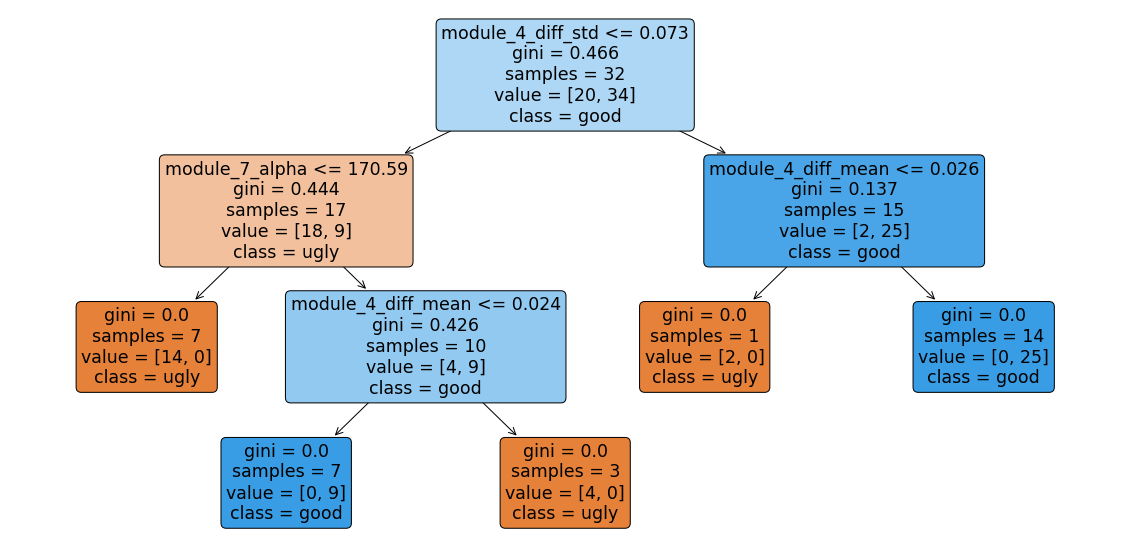

In [25]:
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(clf_rf.estimators_[0], 
          feature_names=ngs_reads.columns,
          class_names=['ugly', 'good'], 
          filled=True, impurity=True, 
          rounded=True)

[Text(0.5, 0.875, 'module_3_beta <= 5.022\ngini = 0.431\nsamples = 36\nvalue = [17, 37]\nclass = good'),
 Text(0.2, 0.625, 'module_7_beta <= 1.115\ngini = 0.198\nsamples = 6\nvalue = [8, 1]\nclass = ugly'),
 Text(0.1, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [7, 0]\nclass = ugly'),
 Text(0.3, 0.375, 'module_6_n_content <= 0.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = ugly'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = good'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = ugly'),
 Text(0.8, 0.625, 'module_2_std_neg <= 0.164\ngini = 0.32\nsamples = 30\nvalue = [9, 36]\nclass = good'),
 Text(0.7, 0.375, 'module_1_a0 <= 39.166\ngini = 0.053\nsamples = 24\nvalue = [1, 36]\nclass = good'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 23\nvalue = [0, 36]\nclass = good'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = ugly'),
 Text(0.9, 0.375, 'gini = 0.0\nsamples = 6\nvalue = [8, 0]\nclass = ugly')]

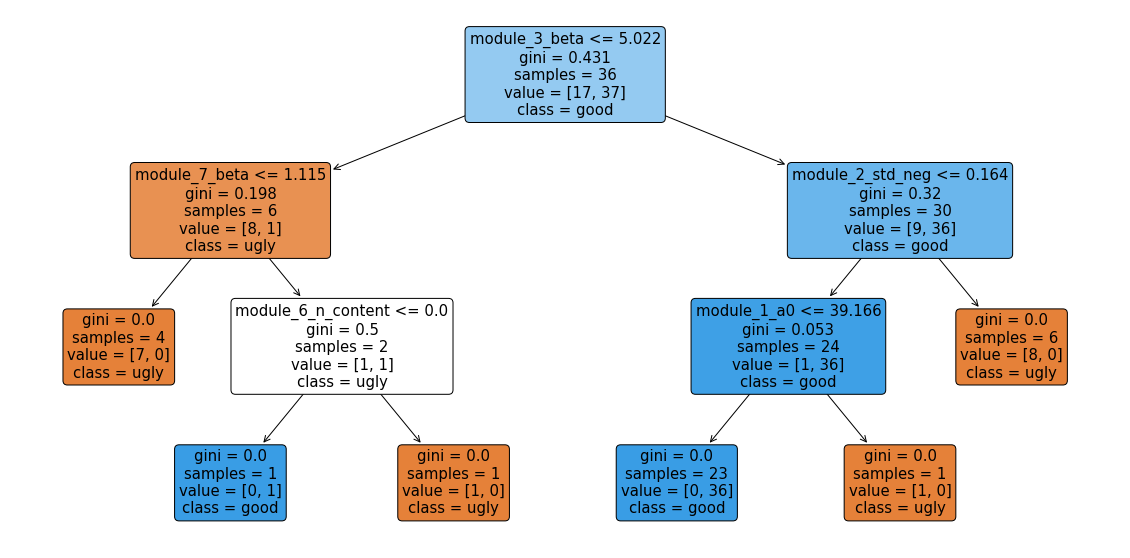

In [26]:
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(clf_rf.estimators_[12], 
          feature_names=ngs_reads.columns,
          class_names=['ugly', 'good'], 
          filled=True, impurity=True, 
          rounded=True)

#### Other Classification Algorithms

Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
clf_lg = LogisticRegression(random_state=0).fit(X_train, y_train)

In [28]:
y_pred = clf_lg.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.875
Precision:  0.8571428571428571
Recall:  1.0
F1 Score:  0.923076923076923


Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB().fit(X_train, y_train)

In [30]:
y_pred = clf_gnb.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.875
Precision:  0.8571428571428571
Recall:  1.0
F1 Score:  0.923076923076923


K Nearest Neighbors

In [31]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.9166666666666666
Precision:  0.9
Recall:  1.0
F1 Score:  0.9473684210526316
